## Importing libraries/data

### Importing Libraries

In [1]:
# For general use
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# For our classifiers
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import neural_network

# For saving classifier to file
import pickle

# For confusion matrix/data importing
from sklearn import metrics  
from sklearn.datasets import load_digits  

### Importing CSV data

In [33]:
dfs = []
for cls in ['+', ')', '(', ',', '-']:#,'0','1','2','3','4','5','6','7','8','9']:
    print(f"Loading {cls}.CSV...")
    a = pd.read_csv("CSV/"+cls+".csv", index_col=0)
    a['class'] = cls
    dfs.append(a)

print("Concatenating Data...")
df = pd.concat(dfs,ignore_index=True, sort=False)
print("Done")

Loading +.CSV...
Loading ).CSV...
Loading (.CSV...
Loading ,.CSV...
Loading -.CSV...
Concatenating Data...
Done


In [34]:
df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,+
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,+
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,+
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,+
4,0,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
89660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
89661,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
89662,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-


### Test/Train split

In [35]:
features = [feature for feature in df]
features.remove("class")

all_X = np.array(df[features])
all_y = np.array(df["class"])

train_X = np.array(df[df.index%2 == 0][features])
train_y = df[df.index%2 == 0]["class"]

test_X = np.array(df[df.index%2 == 1][features])
test_y = df[df.index%2 == 1]["class"]

## Testing classifiers
I conducted some "accuracy vs parameter" tests and found these to the be the optimal `n_neighbors` and `max_depth` values. In the future I will put those tests here

In [36]:
# Getting a subset of the data for faster runtime
num = 100
train_X_KN = np.array(df[df.index%num == 0][features])
train_y_KN = df[df.index%num == 0]["class"]

test_X_KN = np.array(df[df.index%num == 1][features])
test_y_KN = df[df.index%num == 1]["class"]

# Kneighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
print("Fitting...")
clf.fit(train_X_KN, train_y_KN)
print("Scoring...")
clf.score(test_X_KN, test_y_KN)

Fitting...
Scoring...


0.6521739130434783

In [37]:
# Decision Tree
clf = tree.DecisionTreeClassifier(random_state=10)
print("Fitting...")
clf.fit(train_X, train_y)
print("Scoring...")
clf.score(test_X, test_y)

Fitting...
Scoring...


0.983806209850107

In [38]:
# Gaussian Naive Bayes
clf = naive_bayes.GaussianNB()
print("Fitting...")
clf.fit(train_X, train_y)
print("Scoring...")
clf.score(test_X, test_y)

Fitting...
Scoring...


0.9196556031406139

### Finding most accurate hidden_layer_sizes value

In [47]:
# Getting a subset of the data for faster runtime (again)
data_portion = 100
train_X_NN = np.array(df[df.index%data_portion == 0][features])
train_y_NN = df[df.index%data_portion == 0]["class"]

test_X_NN = np.array(df[df.index%data_portion == 1][features])
test_y_NN = df[df.index%data_portion == 1]["class"]

# Recording scores
scoresNN = []
for hid in range(1, 40, 5):
    print(f"fitting and scoring hidden_layer_sizes={hid}...")
    clf = neural_network.MLPClassifier(hidden_layer_sizes=(hid),max_iter=2000, random_state=42)
    clf.fit(train_X_NN, train_y_NN)
    scoresNN.append(clf.score(test_X_NN, test_y_NN))

fitting and scoring hidden_layer_sizes=1...
fitting and scoring hidden_layer_sizes=6...
fitting and scoring hidden_layer_sizes=11...
fitting and scoring hidden_layer_sizes=16...
fitting and scoring hidden_layer_sizes=21...
fitting and scoring hidden_layer_sizes=26...
fitting and scoring hidden_layer_sizes=31...
fitting and scoring hidden_layer_sizes=36...


In [48]:
for i, score in zip(range(len(scoresNN)), scoresNN):
    print("hidden_layer_sizes =", i*5+1, '  ::  ', score)

hidden_layer_sizes = 1   ::   0.5440356744704571
hidden_layer_sizes = 6   ::   0.7959866220735786
hidden_layer_sizes = 11   ::   0.7670011148272018
hidden_layer_sizes = 16   ::   0.7725752508361204
hidden_layer_sizes = 21   ::   0.7837235228539576
hidden_layer_sizes = 26   ::   0.8171683389074693
hidden_layer_sizes = 31   ::   0.8182831661092531
hidden_layer_sizes = 36   ::   0.8182831661092531


Clearly `hidden_layer_sizes=16` is the most accurate value.

Using this value, I will conduct accuracy testing with all of the data

In [49]:
# Getting a skewed test/train split so that I will train on the majority 
#  of the data, but still have a few data to test on
num = 25
train_X3 = np.array(df[df.index%num != 0][features])
train_y3 = df[df.index%num != 0]["class"]

test_X3 = np.array(df[df.index%num == 0][features])
test_y3 = df[df.index%num == 0]["class"]

clf = neural_network.MLPClassifier(hidden_layer_sizes=(33),max_iter=8000, random_state=42)
print("fitting...")
clf.fit(train_X3, train_y3)
print("scoring...")
clf.score(test_X3, test_y3)

fitting...
scoring...


0.9983272930025091

In [51]:
with open('clf_just_math.pk', 'wb') as fout:
    pickle.dump(clf, fout)

In [71]:
clf_math = 0
clf_digi = 0
with open('clf_just_math.pk', 'rb') as fin:
    clf_math = pickle.load(fin)

with open('clf_justDigits.pk', 'rb') as fin:
    clf_digi = pickle.load(fin)


In [54]:
# all_y[0]
# clf2.predict(all_X[0].reshape(28,28))
# clf2.predict([all_X[0]])
clf2.predict_proba([all_X[33433]])

array([[1.02784120e-29, 1.00000000e+00, 2.25079960e-24, 3.04710142e-14,
        5.66887518e-93]])

In [55]:
all_y[33433]

')'

In [9]:
eval("(7*7)-40")

9

## Predicting things from the server  

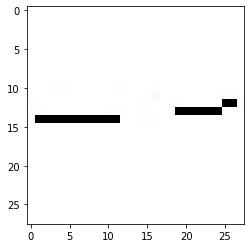

In [56]:
plt.imshow(test_X[30000].reshape(28,28), cmap=plt.cm.binary)

In [68]:
test_df = pd.read_csv("tests/tests.csv")
test_df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


+  ::  8.416603600968807e-194
)  ::  1.8366465995842252e-147
(  ::  1.0
,  ::  8.209373055365604e-96
-  ::  7.4138434233079225e-115
0  ::  2.8567679269099252e-11
1  ::  0.00031937776349764117
2  ::  0.056156276125878445
3  ::  0.8024828842820134
4  ::  0.07223482783502287
5  ::  0.022123966663751573
6  ::  9.03774106807503e-05
7  ::  1.8649591306808423e-08
8  ::  0.046077917001501996
9  ::  0.0005143542394944446


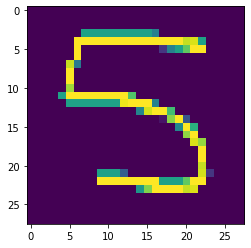

In [85]:
np.array(test_df.iloc[0])
test_X = np.array(test_df[features])

math_preds = clf_math.predict_proba([test_X[0]])
for cls_name, cls_acc in zip(['+', ')', '(', ',', '-'], math_preds[0]):
    print(cls_name, " :: ", cls_acc)
    
digi_preds = clf_digi.predict_proba([test_X[0]])
for cls_name, cls_acc in zip([str(x) for x in range(10)], digi_preds[0]):
    print(cls_name, " :: ", cls_acc)

plt.imshow(test_X[0].reshape(28,28))

In [82]:
digi_preds = clf_math.predict_proba([test_X[0]])
digi_preds

array([[8.41660360e-194, 1.83664660e-147, 1.00000000e+000,
        8.20937306e-096, 7.41384342e-115]])